## Homework 2

#### Preparation

Some initializations are necessary

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Apartment prices

> Läs in data i dataframe

To read data from file, it is to be noted that the delimiter is comma, (,), so a specific method may be used.

In [303]:
apartments_df = pd.read_csv('Booli_sold.csv')

To see some data

In [304]:
apartments_df

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
0,3995000,4467.0,73.0,3.0,2018-10-15 13:33:18,1935.0,Lägenhet,3263989,2018-11-08,3820000,...,59.371033,18.054057,NaN,Stockholm,Stockholms län,260,MOHV,1901865,Broker,http://www.mohv.se/
1,1995000,1773.0,36.0,1.0,2018-10-05 14:29:28,1968.0,Lägenhet,3256231,2018-10-19,2355000,...,59.371242,18.057821,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
2,5100000,3839.0,81.0,3.0,2018-09-11 13:44:43,1936.0,Lägenhet,3236660,2018-09-27,6110000,...,59.371617,18.054716,NaN,Stockholm,Stockholms län,186,Historiska Hem AB,65645750,Broker,http://historiskahem.se/
3,5495000,4483.0,107.0,4.0,2018-08-25 02:56:56,1936.0,Lägenhet,3224374,2018-09-06,8050000,...,59.371480,18.053880,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
4,1995000,1696.0,29.0,1.0,2018-06-15 17:16:19,1936.0,Lägenhet,3185496,2018-06-18,2400000,...,59.372160,18.053542,True,Stockholm,Stockholms län,166,Mäklarhuset,204,Broker,http://www.maklarhuset.se/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1495000,1388.0,26.0,1.0,2012-10-20 07:36:37,1935.0,Lägenhet,1297784,2012-11-30,1475000,...,59.372272,18.055659,True,Stockholm,Stockholms län,101,Notar,1566,Broker,http://www.notar.se/
154,2245000,2455.0,50.0,2.0,2012-10-19 15:32:58,1935.0,Lägenhet,1296874,2012-10-27,2245000,...,59.372272,18.055659,True,Stockholm,Stockholms län,101,Notar,1566,Broker,http://www.notar.se/
155,1450000,1072.0,23.0,1.0,2012-09-14 05:10:08,1936.0,Lägenhet,1270599,2012-10-22,1450000,...,59.371194,18.053552,NaN,Stockholm,Stockholms län,255,Notar,1566,Broker,http://www.notar.se/
156,2495000,2748.0,56.0,3.0,2012-09-21 12:19:37,1935.0,Lägenhet,1276232,2012-10-09,2200000,...,59.372759,18.054634,True,Stockholm,Stockholms län,70,Notar,1566,Broker,http://www.notar.se/


To see data types

In [305]:
apartments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listPrice                         158 non-null    int64  
 1   rent                              156 non-null    float64
 2   livingArea                        157 non-null    float64
 3   rooms                             157 non-null    float64
 4   published                         158 non-null    object 
 5   constructionYear                  144 non-null    float64
 6   objectType                        158 non-null    object 
 7   booliId                           158 non-null    int64  
 8   soldDate                          158 non-null    object 
 9   soldPrice                         158 non-null    int64  
 10  soldPriceSource                   158 non-null    object 
 11  url                               158 non-null    object 
 12  floor   

1. Price per Square Meter<br>beräkna ny variabel, ppsqm

The new variable is placed as the fourth column. Values are rounded to two decimal places.

In [306]:
#apartments_extended_df = apartments_df.insert(3,'ppSqm',round(apartments_df['listPrice'] / apartments_df['livingArea'], 2 ))
apartments_df.insert(3,'ppSqm',round(apartments_df['listPrice'] / apartments_df['livingArea'], 2 ))

In [307]:
apartments_df

,listPrice,rent,livingArea,ppSqm,rooms,published,constructionYear,objectType,booliId,soldDate,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
0,3995000,4467.0,73.0,54726.03,3.0,2018-10-15 13:33:18,1935.0,Lägenhet,3263989,2018-11-08,...,59.371033,18.054057,NaN,Stockholm,Stockholms län,260,MOHV,1901865,Broker,http://www.mohv.se/
1,1995000,1773.0,36.0,55416.67,1.0,2018-10-05 14:29:28,1968.0,Lägenhet,3256231,2018-10-19,...,59.371242,18.057821,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
2,5100000,3839.0,81.0,62962.96,3.0,2018-09-11 13:44:43,1936.0,Lägenhet,3236660,2018-09-27,...,59.371617,18.054716,NaN,Stockholm,Stockholms län,186,Historiska Hem AB,65645750,Broker,http://historiskahem.se/
3,5495000,4483.0,107.0,51355.14,4.0,2018-08-25 02:56:56,1936.0,Lägenhet,3224374,2018-09-06,...,59.371480,18.053880,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
4,1995000,1696.0,29.0,68793.10,1.0,2018-06-15 17:16:19,1936.0,Lägenhet,3185496,2018-06-18,...,59.372160,18.053542,True,Stockholm,Stockholms län,166,Mäklarhuset,204,Broker,http://www.maklarhuset.se/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1495000,1388.0,26.0,57500.00,1.0,2012-10-20 07:36:37,1935.0,Lägenhet,1297784,2012-11-30,...,59.372272,18.055659,True,Stockholm,Stockholms län,101,Notar,1566,Broker,http://www.notar.se/
154,2245000,2455.0,50.0,44900.00,2.0,2012-10-19 15:32:58,1935.0,Lägenhet,1296874,2012-10-27,...,59.372272,18.055659,True,Stockholm,Stockholms län,101,Notar,1566,Broker,http://www.notar.se/
155,1450000,1072.0,23.0,63043.48,1.0,2012-09-14 05:10:08,1936.0,Lägenhet,1270599,2012-10-22,...,59.371194,18.053552,NaN,Stockholm,Stockholms län,255,Notar,1566,Broker,http://www.notar.se/
156,2495000,2748.0,56.0,44553.57,3.0,2012-09-21 12:19:37,1935.0,Lägenhet,1276232,2012-10-09,...,59.372759,18.054634,True,Stockholm,Stockholms län,70,Notar,1566,Broker,http://www.notar.se/


2. Five most expensive apartments wrt ppsqm

In [308]:
apartments_df.sort_values(by='ppSqm')

,listPrice,rent,livingArea,ppSqm,rooms,published,constructionYear,objectType,booliId,soldDate,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
130,2200000,3563.0,69.0,31884.06,2.0,2014-01-23 20:33:54,1939.0,Lägenhet,1579799,2014-02-05,...,59.371388,18.055092,True,Stockholm,Stockholms län,186,Fastighetsbyrån,1573,Broker,http://www.fastighetsbyran.se/
146,3495000,4251.0,98.0,35663.27,3.0,2013-02-22 22:16:16,1968.0,Lägenhet,1362997,2013-03-28,...,59.371047,18.058368,True,Stockholm,Stockholms län,246,Notar,1566,Broker,http://www.notar.se/
141,2495000,3530.0,69.0,36159.42,2.0,2013-05-04 01:14:18,1937.0,Lägenhet,1295930,2013-05-19,...,59.371587,18.055203,True,Stockholm,Stockholms län,184,Notar,1566,Broker,http://www.notar.se/
93,3300000,4529.0,91.0,36263.74,4.0,2015-05-07 17:48:41,1931.0,Lägenhet,1870193,2015-05-21,...,59.371617,18.054716,NaN,Stockholm,Stockholms län,186,Fastighetsbyrån,1573,Broker,http://www.fastighetsbyran.se/
151,2300000,2835.0,63.0,36507.94,2.0,2012-10-11 17:37:23,1969.0,Lägenhet,1290945,2013-01-18,...,59.371526,18.057338,True,Stockholm,Stockholms län,354,SkandiaMäklarna,1570,Broker,http://www.skandiamaklarna.se/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,3495000,3052.0,47.0,74361.70,2.0,2016-07-31 06:06:54,NaN,Lägenhet,2145197,2016-08-15,...,59.372253,18.053174,True,Stockholm,Stockholms län,171,Notar,1566,Broker,http://www.notar.se/
54,1795000,1374.0,23.0,78043.48,1.0,2016-04-15 19:10:49,1935.0,Lägenhet,2078171,2016-04-28,...,59.371966,18.055422,True,Stockholm,Stockholms län,135,Notar,1566,Broker,http://www.notar.se/
50,1890000,1464.0,24.0,78750.00,1.0,2016-06-11 08:55:51,1935.0,Lägenhet,2125576,2016-06-21,...,59.371780,18.055270,NaN,Stockholm,Stockholms län,161,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/
10,2295000,1743.0,29.0,79137.93,1.0,2018-05-05 04:43:36,1935.0,Lägenhet,3125674,2018-05-19,...,59.372047,18.054986,True,Stockholm,Stockholms län,136,Mäklarhuset,204,Broker,http://www.maklarhuset.se/


Show the five highest values, avoiding NaN value

In [309]:
apartments_df.sort_values(by='ppSqm', na_position='first').tail()

,listPrice,rent,livingArea,ppSqm,rooms,published,constructionYear,objectType,booliId,soldDate,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
24,2500000,1400.0,35.0,71428.57,1.0,2017-09-08 15:22:24,1936.0,Lägenhet,2405043,2017-10-06,...,59.371480,18.053880,NaN,Stockholm,Stockholms län,218,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/
49,3495000,3052.0,47.0,74361.70,2.0,2016-07-31 06:06:54,NaN,Lägenhet,2145197,2016-08-15,...,59.372253,18.053174,True,Stockholm,Stockholms län,171,Notar,1566,Broker,http://www.notar.se/
54,1795000,1374.0,23.0,78043.48,1.0,2016-04-15 19:10:49,1935.0,Lägenhet,2078171,2016-04-28,...,59.371966,18.055422,True,Stockholm,Stockholms län,135,Notar,1566,Broker,http://www.notar.se/
50,1890000,1464.0,24.0,78750.00,1.0,2016-06-11 08:55:51,1935.0,Lägenhet,2125576,2016-06-21,...,59.371780,18.055270,NaN,Stockholm,Stockholms län,161,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/
10,2295000,1743.0,29.0,79137.93,1.0,2018-05-05 04:43:36,1935.0,Lägenhet,3125674,2018-05-19,...,59.372047,18.054986,True,Stockholm,Stockholms län,136,Mäklarhuset,204,Broker,http://www.maklarhuset.se/


Another function

In [310]:
apartments_df.nlargest(5,'ppSqm')

,listPrice,rent,livingArea,ppSqm,rooms,published,constructionYear,objectType,booliId,soldDate,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
10,2295000,1743.0,29.0,79137.93,1.0,2018-05-05 04:43:36,1935.0,Lägenhet,3125674,2018-05-19,...,59.372047,18.054986,True,Stockholm,Stockholms län,136,Mäklarhuset,204,Broker,http://www.maklarhuset.se/
50,1890000,1464.0,24.0,78750.00,1.0,2016-06-11 08:55:51,1935.0,Lägenhet,2125576,2016-06-21,...,59.371780,18.055270,NaN,Stockholm,Stockholms län,161,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/
54,1795000,1374.0,23.0,78043.48,1.0,2016-04-15 19:10:49,1935.0,Lägenhet,2078171,2016-04-28,...,59.371966,18.055422,True,Stockholm,Stockholms län,135,Notar,1566,Broker,http://www.notar.se/
49,3495000,3052.0,47.0,74361.70,2.0,2016-07-31 06:06:54,NaN,Lägenhet,2145197,2016-08-15,...,59.372253,18.053174,True,Stockholm,Stockholms län,171,Notar,1566,Broker,http://www.notar.se/
24,2500000,1400.0,35.0,71428.57,1.0,2017-09-08 15:22:24,1936.0,Lägenhet,2405043,2017-10-06,...,59.371480,18.053880,NaN,Stockholm,Stockholms län,218,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/


3. Average ppsqm

In [311]:
average = apartments_df['ppSqm'].mean()

In [312]:
print(round(average,2))

54127.44


4. Interesting to see that ...

Gör en plot mellan ppSqm och yta

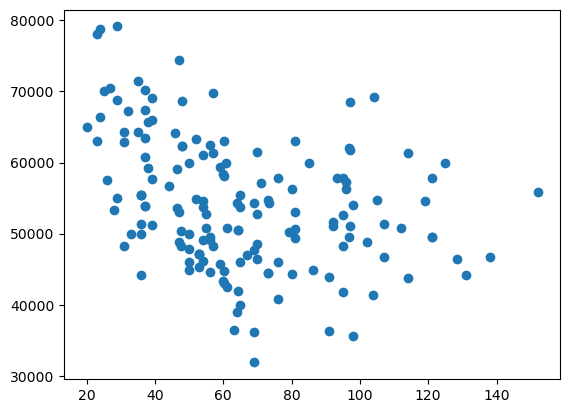

In [313]:
fig, ax = plt.subplots()
livingArea_asArray = np.asarray(apartments_df['livingArea'])
ppSqm_asArray = np.asarray(apartments_df['ppSqm'])
#ax.plot = (livingArea_asArray,ppSqm_asArray)
ax.scatter(livingArea_asArray,ppSqm_asArray)
# plt.show()

#### Gör en dataframe av de två kolumnerna

In [314]:
livingArea_ppSqm_df = pd.DataFrame(data=apartments_df,columns=['livingArea','ppSqm'])

In [315]:
livingArea_ppSqm_df 

,livingArea,ppSqm
0,73.0,54726.03
1,36.0,55416.67
2,81.0,62962.96
3,107.0,51355.14
4,29.0,68793.10
...,...,...
153,26.0,57500.00
154,50.0,44900.00
155,23.0,63043.48
156,56.0,44553.57


In [316]:
round(livingArea_ppSqm_df.corr(),3)

,livingArea,ppSqm
livingArea,1.000,-0.353
ppSqm,-0.353,1.000


Ta bort rader med NaN, blir ingen skillnad i R, eftersom corr() tar bort NaN !!

In [317]:
livingArea_ppSqm_df_without_NaN  = livingArea_ppSqm_df.dropna(ignore_index=True) 

In [318]:
livingArea_ppSqm_df_without_NaN

,livingArea,ppSqm
0,73.0,54726.03
1,36.0,55416.67
2,81.0,62962.96
3,107.0,51355.14
4,29.0,68793.10
...,...,...
152,26.0,57500.00
153,50.0,44900.00
154,23.0,63043.48
155,56.0,44553.57


In [319]:
livingArea_ppSqm_df_without_NaN.corr()

,livingArea,ppSqm
livingArea,1.000000,-0.352784
ppSqm,-0.352784,1.000000


#### Undersök yta mindre än 70 kvm eller större

In [320]:
livingArea_ppSqm_df_lt_70_sqm_with_NaN = livingArea_ppSqm_df.where(livingArea_ppSqm_df['livingArea'] < 70)

In [321]:
livingArea_ppSqm_df_lt_70_sqm_with_NaN

,livingArea,ppSqm
0,NaN,NaN
1,36.0,55416.67
2,NaN,NaN
3,NaN,NaN
4,29.0,68793.10
...,...,...
153,26.0,57500.00
154,50.0,44900.00
155,23.0,63043.48
156,56.0,44553.57


In [322]:
livingArea_ppSqm_df_lt_70_sqm_without_NaN = livingArea_ppSqm_df_lt_70_sqm_with_NaN.dropna()

In [323]:
round(livingArea_ppSqm_df_lt_70_sqm_without_NaN.corr(),3)

,livingArea,ppSqm
livingArea,1.000,-0.605
ppSqm,-0.605,1.000


In [324]:
livingArea_ppSqm_df_gte_70_sqm = livingArea_ppSqm_df.where(livingArea_ppSqm_df['livingArea'] >= 70).dropna()

In [325]:
livingArea_ppSqm_df_gte_70_sqm

,livingArea,ppSqm
0,73.0,54726.03
2,81.0,62962.96
3,107.0,51355.14
5,125.0,59960.00
6,79.2,50189.39
9,96.0,57239.58
12,92.0,51630.43
14,97.0,68556.70
18,71.0,57183.10
20,93.4,57815.85


In [326]:
round(livingArea_ppSqm_df_gte_70_sqm.corr(),3)

,livingArea,ppSqm
livingArea,1.000,0.027
ppSqm,0.027,1.000


#### Gör en matris av de två arrayerna, blir komplicerat med NaN-värdeparen (1 eller 2 sådana par)

In [327]:
livingArea_ppSqm_matrix = np.asmatrix([livingArea_asArray,ppSqm_asArray])

In [328]:
livingArea_ppSqm_matrix.ndim

2

In [329]:
livingArea_ppSqm_matrix.shape

(2, 158)

In [330]:
livingArea_ppSqm_matrix.strides # 8*158 = 1264

(1264, 8)

In [331]:
en_obs = livingArea_ppSqm_matrix[1][0]

In [332]:
type(en_obs)

numpy.matrix

In [333]:
print(en_obs)

[[54726.03 55416.67 62962.96 51355.14 68793.1  59960.   50189.39 50544.32
  50544.32 57239.58 79137.93 53085.11 51630.43 69102.56 68556.7  56704.55
  59900.   59934.32 57183.1  64354.84 57815.85 54296.88 59322.03 66025.64
  71428.57 63513.51 62410.71 59941.18 57763.16 70135.14 59139.78 69230.77
  61804.12 54807.69 70000.   61428.57 69736.84 56250.   61018.52 68645.83
  61359.65 57692.31 55384.62 64285.71 57842.11 57809.92 63018.24 54347.83
  67432.43 74361.7  78750.   65657.89 49553.57 48500.   78043.48 70446.1
  47075.47 54030.61 51030.93 55921.05 58043.12 59210.53 60810.81 62395.83
  53024.69 54353.74 50848.21 66458.33 46739.13 58333.33 53703.7  52727.27
  51153.85 62395.83 64130.43 47014.93 52785.71 50818.18 49545.45 62047.57
  47075.47 51032.61 52578.95 49545.45 54629.63 55416.67 67187.5  50819.67
  61403.51 62903.23 43034.83 54761.9  48774.51 36263.74 63365.38 50000.
  45677.97 49074.07 55416.67 44776.12 56250.   48245.61      nan 49107.14
  51388.89 43333.33 44236.64 46375.68 438

In [334]:
tvaa_obs = livingArea_ppSqm_matrix[...,157]

In [335]:
type(tvaa_obs)

numpy.matrix

In [336]:
tvaa_obs.ndim

2

In [337]:
tvaa_obs.shape

(2, 1)

In [338]:
tvaa_obs

matrix([[   50.],
        [46000.]])

In [339]:
livingArea_ppSqm_matrix

matrix([[7.300000e+01, 3.600000e+01, 8.100000e+01, 1.070000e+02,
         2.900000e+01, 1.250000e+02, 7.920000e+01, 6.430000e+01,
         6.430000e+01, 9.600000e+01, 2.900000e+01, 4.700000e+01,
         9.200000e+01, 3.900000e+01, 9.700000e+01, 4.400000e+01,
         5.000000e+01, 6.090000e+01, 7.100000e+01, 3.100000e+01,
         9.340000e+01, 6.400000e+01, 5.900000e+01, 3.900000e+01,
         3.500000e+01, 3.700000e+01, 5.600000e+01, 8.500000e+01,
         7.600000e+01, 3.700000e+01, 4.650000e+01, 1.040000e+02,
         9.700000e+01, 5.200000e+01, 2.500000e+01, 7.000000e+01,
         5.700000e+01, 8.000000e+01, 5.400000e+01, 4.800000e+01,
         1.140000e+02, 3.900000e+01, 6.500000e+01, 3.500000e+01,
         9.500000e+01, 1.210000e+02, 6.030000e+01, 6.900000e+01,
         3.700000e+01, 4.700000e+01, 2.400000e+01, 3.800000e+01,
         5.600000e+01, 7.000000e+01, 2.300000e+01, 2.690000e+01,
         5.300000e+01, 9.800000e+01, 9.700000e+01, 1.520000e+02,
         6.030000e+01, 3.

In [340]:
np.corrcoef(livingArea_asArray,ppSqm_asArray)

array([[nan, nan],
       [nan, nan]])

In [341]:
# apartments_df['livingArea','ppSqm'].corr(method='callable')
np.corrcoef(livingArea_ppSqm_matrix)

array([[nan, nan],
       [nan, nan]])

In [342]:
livingArea_asArray 

array([ 73. ,  36. ,  81. , 107. ,  29. , 125. ,  79.2,  64.3,  64.3,
        96. ,  29. ,  47. ,  92. ,  39. ,  97. ,  44. ,  50. ,  60.9,
        71. ,  31. ,  93.4,  64. ,  59. ,  39. ,  35. ,  37. ,  56. ,
        85. ,  76. ,  37. ,  46.5, 104. ,  97. ,  52. ,  25. ,  70. ,
        57. ,  80. ,  54. ,  48. , 114. ,  39. ,  65. ,  35. ,  95. ,
       121. ,  60.3,  69. ,  37. ,  47. ,  24. ,  38. ,  56. ,  70. ,
        23. ,  26.9,  53. ,  98. ,  97. , 152. ,  60.3,  38. ,  37. ,
        48. ,  81. ,  73.5, 112. ,  24. , 138. ,  60. ,  54. ,  55. ,
        39. ,  48. ,  46. ,  67. ,  70. ,  55. , 121. ,  96.7,  53. ,
        92. ,  95. , 121. ,  54. ,  36. ,  32. ,  61. ,  57. ,  31. ,
        60.3, 105. , 102. ,  91. ,  52. ,  50. ,  59. ,  54. ,  36. ,
        60.3,  96. ,  57. ,   nan,  56. ,  36. ,  60. , 131. , 128.3,
       114. ,  37. ,  65. ,  81. ,  46.5, 119. ,  86.3,  29. ,  91. ,
        61. ,  37. , 103.8,  50. ,  65. ,  81. ,  96.7,  36. ,  28. ,
        70. ,  73. ,

In [343]:
type(livingArea_asArray)

numpy.ndarray

In [344]:
livingArea_asArray.ndim

1

In [345]:
ppSqm_asArray

array([54726.03, 55416.67, 62962.96, 51355.14, 68793.1 , 59960.  ,
       50189.39, 50544.32, 50544.32, 57239.58, 79137.93, 53085.11,
       51630.43, 69102.56, 68556.7 , 56704.55, 59900.  , 59934.32,
       57183.1 , 64354.84, 57815.85, 54296.88, 59322.03, 66025.64,
       71428.57, 63513.51, 62410.71, 59941.18, 57763.16, 70135.14,
       59139.78, 69230.77, 61804.12, 54807.69, 70000.  , 61428.57,
       69736.84, 56250.  , 61018.52, 68645.83, 61359.65, 57692.31,
       55384.62, 64285.71, 57842.11, 57809.92, 63018.24, 54347.83,
       67432.43, 74361.7 , 78750.  , 65657.89, 49553.57, 48500.  ,
       78043.48, 70446.1 , 47075.47, 54030.61, 51030.93, 55921.05,
       58043.12, 59210.53, 60810.81, 62395.83, 53024.69, 54353.74,
       50848.21, 66458.33, 46739.13, 58333.33, 53703.7 , 52727.27,
       51153.85, 62395.83, 64130.43, 47014.93, 52785.71, 50818.18,
       49545.45, 62047.57, 47075.47, 51032.61, 52578.95, 49545.45,
       54629.63, 55416.67, 67187.5 , 50819.67, 61403.51, 62903

### The Swedish Election of 2018

> Läs in data från filen ... i en data frame

In [346]:
> 

SyntaxError: invalid syntax (3955887718.py, line 1)

1. Total Number of Legitimate Votes<br>

2. In Which Municipality did the Social Democratic Party Get the Highest Voting Percent?<Br>

3. Top 3 Municipalities on Highest Participation

### Predicting Strokes

> Läs in data från filen ... i en data frame

##### An Interesting Conclusion From the Data

> undersök tex samband mellan ålder och stroke, och mellan ålder, en variabel till ( tex blodtryck, diabetes, rökning) och stroke. visa i en plot